# Using PCA

This is a rough draft don't judge me too harshly if you look at this danny

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Getting Data

Today we'll be looking at sklearn's breast cancer identification dataset.

In [71]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [72]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data)

scaled = scaler.transform(data)

scaled_df = pd.DataFrame(scaled, columns = cancer.feature_names)

scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 2. PCA

In [76]:
from sklearn.decomposition import PCA
pca_full = PCA()
pca_full.fit(scaled_df)
print(round(sum(pca_full.explained_variance_ratio_),4))

1.0


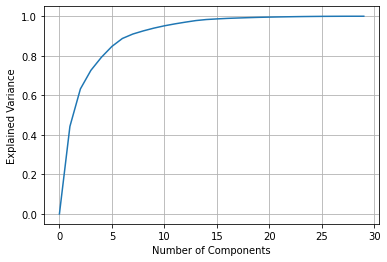

In [78]:
explained_variance = []
for i in range(len(scaled_df.columns)):
    pca = PCA(n_components=i)
    pca.fit(scaled_df)
    explained_variance.append(round(sum(pca.explained_variance_ratio_),4))
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

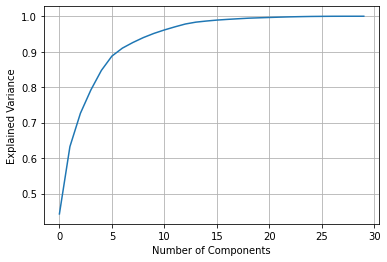

In [77]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [84]:
pca_2 = PCA(n_components=2)
pca_2.fit(scaled_df)
scaled_pca_2 = pca_2.transform(scaled_df)
pd.DataFrame(scaled_pca_2).head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


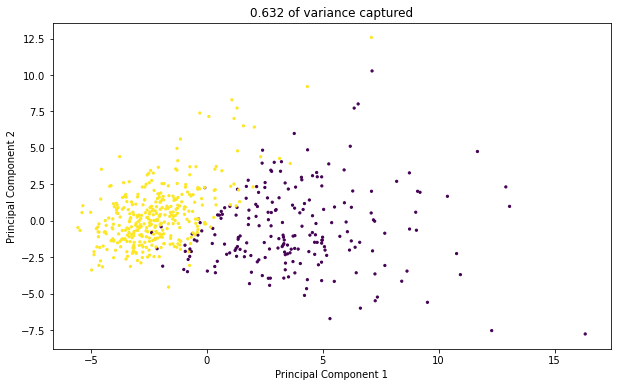

In [85]:
plt.figure(figsize = (10,6))
plt.scatter(scaled_pca_2[:,0],scaled_pca_2[:,1], c = cancer.target, s = 5)
plt.title(str(round(sum(pca_2.explained_variance_ratio_),3)) + ' of variance captured')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [86]:
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(scaled_df)
scaled_pca_3 = pca_3.transform(scaled_df)

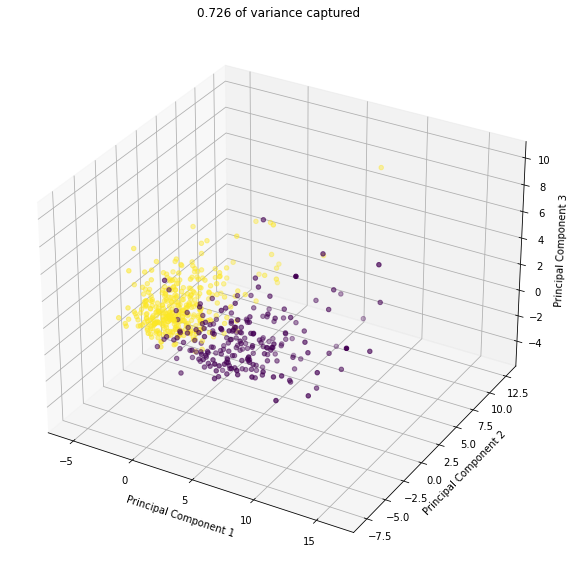

In [87]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(scaled_pca_3[:,0],scaled_pca_3[:,1],scaled_pca_3[:,2], c = cancer.target)
ax.set_title(str(round(sum(pca_3.explained_variance_ratio_),3)) + ' of variance captured')
ax.set_zlabel('Principal Component 3')
ax.set_ylabel('Principal Component 2')
ax.set_xlabel('Principal Component 1')

plt.show()

## 3. (Time Permitting) Kernel PCA

Standard PCA is extremely useful for data that is linearly separable, but it falls short when data has nonlinear structure. In those cases, Kernel PCA may be of use. Kernel PCA is similar in concept to Support Vector Machines (SVMs), as it works by using a kernel function to move data into a higher dimensional space, where the data may become linearly seperable. 

Here's some circles like we saw last class:

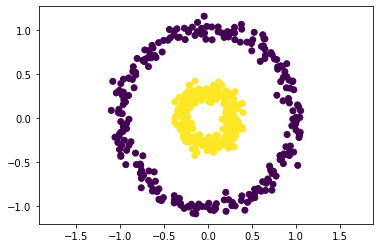

In [192]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.06, random_state=10)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Try using a regular PCA to transform this data and plot the results.

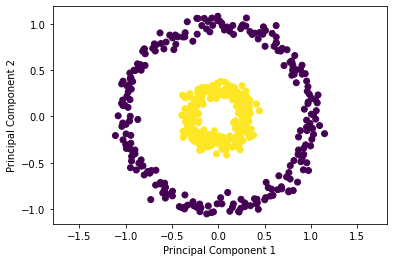

In [193]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


What does your group observe?

answer here

Now try using a Kernel PCA to transform the data. Try to find a kernel and set of parameters that separate the data linearly. (Hint: the `'rbf'` kernel is sensitive to different values of `gamma`)

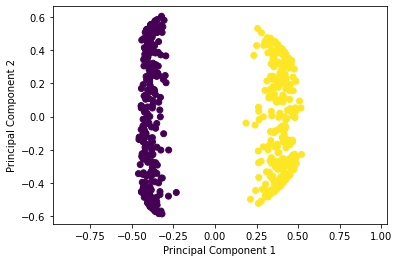

In [194]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(kernel="rbf", gamma=2)

X_kernel_pca = kernel_pca.fit(X).transform(X)

plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y)
plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Other Dimension Reduction Techniques

- Incremental PCA: Like a standard PCA but can be much more memory efficient in some cases.
